# Opportunities for International Solar Project Development

#### Target Audience: a team of executives for a domestic solar power developer who is interested in expanding into the global market

The greatest untapped markets exist in Africa, Eurasia and Central America.


### data wrangling: etl

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
solar = pd.read_excel('Global-Solar-Power-Tracker-May-2022.xlsx',sheet_name='Data')

In [21]:
solar.head()

,Country,Project Name,Phase Name,Project Name in Local Language / Script,Other Name(s),Capacity (MW),Capacity Rating,Status,Start year,Retired year,...,City,"Local area (taluk, county)","Major area (prefecture, district)",State/Province,Region,GEM location ID,GEM phase ID,Other IDs (location),Other IDs (unit/phase),Wiki URL
0,Algeria,Adrar Solar Plant,NaN,NaN,NaN,20,MWp/dc,operating,2015.0,NaN,...,Adrar,Adrar District,NaN,Adrar,Africa,L800008,G800008,Wks0068905,NaN,https://gem.wiki/Adrar_Solar_Plant
1,Algeria,Ain Azel solar farm,NaN,محطة توليد الكهرباء بعين زادة,NaN,20,unknown,operating,NaN,NaN,...,Ain Azel,Ain Arnat,NaN,Sétif,Africa,L800010,G800010,Wks0065285,NaN,https://gem.wiki/Ain_Azel_solar_farm
2,Algeria,Ain El Ibel Solar,PV 1,محطة عين الابل للطاقة الشمسية ١,Ain Albel 1 solar plant,20,unknown,operating,2016.0,NaN,...,Ain El Ibel,Aïn El Ibel District,NaN,Djelfa,Africa,L800012,G800012,Wks0068916,NaN,https://gem.wiki/Ain_El_Ibel_Solar
3,Algeria,Ain El Ibel Solar,PV 2,محطة عين الابل للطاقة الشمسية ٢,Ain Albel 2 solar plant,33,unknown,operating,2017.0,NaN,...,Ain El Ibel,Aïn El Ibel District,NaN,Djelfa,Africa,L800012,G800013,Wks0073479,NaN,https://gem.wiki/Ain_El_Ibel_Solar
4,Algeria,Ain El Mehl Solar,NaN,محطة عين الملح للطاقة الشمسية,Ain El Melh Solar,20,unknown,operating,2017.0,NaN,...,Ain El Mehl,Aïn El Melh District,NaN,M'Sila,Africa,L800013,G800014,Wks0068915,NaN,https://gem.wiki/Ain_El_Mehl_Solar


In [22]:
#check data types
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9331 entries, 0 to 9330
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   9331 non-null   object 
 1   Project Name                              9331 non-null   object 
 2   Phase Name                                3981 non-null   object 
 3   Project Name in Local Language / Script   5014 non-null   object 
 4   Other Name(s)                             1600 non-null   object 
 5   Capacity (MW)                             9331 non-null   int64  
 6   Capacity Rating                           9331 non-null   object 
 7   Status                                    9331 non-null   object 
 8   Start year                                6326 non-null   float64
 9   Retired year                              5 non-null      float64
 10  Operator                            

In [23]:
#change type of start year and retired year
solar['Start year']= solar['Start year'].astype('int', errors = 'ignore')

solar['Retired year']= solar['Retired year'].astype('int', errors = 'ignore')

In [24]:
#extract lists of categories we may be interested in grouping by
country_list = list(solar['Country'].unique())

status_list = list(solar['Status'].unique())

region_list = list(solar['Region'].unique())

In [25]:
#use aggregrate functions to calculate summary statistics, grouping by country, project status and continent

summary = solar.groupby(['Country','Status','Region'],as_index=False).agg(
    #count n projects
    n_projects = ('Project Name', "count"),
    #get minimum capacity 
    min_capacity_MW = ('Capacity (MW)', min),
    #get max capacity
    max_capacity_MW = ('Capacity (MW)', max),
    #find total capacity
    sum_capacity_MW = ('Capacity (MW)', sum),
    #find average capacity
    mean_capacity_MW = ('Capacity (MW)', "mean"),
    #find earliest year
    min_year = ('Start year', min),
    #find latest year
    max_year = ('Start year', max),
    #find mean year
    mean_year = ('Start year', "mean"),
    #find median year
    median_year = ('Start year', "median")
    )
    

In [26]:
#check out our work
summary.head()

,Country,Status,Region,n_projects,min_capacity_MW,max_capacity_MW,sum_capacity_MW,mean_capacity_MW,min_year,max_year,mean_year,median_year
0,Afghanistan,announced,Asia,1,3000,3000,3000,3000.00,2025.0,2025.0,2025.0,2025.0
1,Afghanistan,development,Asia,4,20,50,135,33.75,2022.0,2024.0,2022.5,2022.0
2,Afghanistan,operating,Asia,1,30,30,30,30.00,NaN,NaN,NaN,NaN
3,Afghanistan,shelved,Asia,2,40,50,90,45.00,NaN,NaN,NaN,NaN
4,Albania,announced,Europe,1,150,150,150,150.00,NaN,NaN,NaN,NaN


In [27]:
#compile summaries groubed by region
continents = summary.groupby(['Region','Status'], as_index=False).agg(
    { #count n projects
    'n_projects': 'sum',
    #get minimum capacity 
    'min_capacity_MW':'min',
    #get max capacity
    'max_capacity_MW':'max',
    #find total capacity
    'sum_capacity_MW': 'sum',
    #find average capacity
    'mean_capacity_MW':"mean",
    #find earliest year
    'min_year': 'min',
    #find latest year
    'max_year': 'max',
    #find mean year
    'mean_year': "mean",
    #find median year
    'median_year':"median"
    }
    )
#check out our work
continents.head(12)

,Region,Status,n_projects,min_capacity_MW,max_capacity_MW,sum_capacity_MW,mean_capacity_MW,min_year,max_year,mean_year,median_year
0,Africa,announced,53,10,4000,9712,160.764822,2021.0,2025.0,2023.000000,2023.00
1,Africa,cancelled,52,15,1000,5416,164.165909,NaN,NaN,NaN,NaN
2,Africa,construction,38,11,800,3585,113.265152,2017.0,2024.0,2021.727273,2022.00
3,Africa,development,125,10,7000,19888,93.532693,2020.0,2027.0,2022.378333,2022.00
4,Africa,operating,135,10,200,6986,38.692481,2013.0,2022.0,2018.821013,2019.00
5,Africa,shelved,33,10,600,2947,70.436275,NaN,NaN,NaN,NaN
6,Asia,announced,144,20,10000,38443,505.138631,2017.0,2027.0,2023.358333,2023.50
7,Asia,cancelled,70,20,500,4812,77.372048,2013.0,2018.0,2016.375000,2016.25
8,Asia,construction,105,20,1000,11499,85.988074,2021.0,2024.0,2021.628157,2022.00
9,Asia,development,261,20,4750,38188,113.845153,2017.0,2028.0,2022.273099,2022.00


### Establish the Current Operating Capacity in Each Region:

Asia leads the world with the greatest number of operating solar facilities and total power capacity of those operating facilities - BY FAR!

North America is a distant second, with Europe a distant third behind NA.

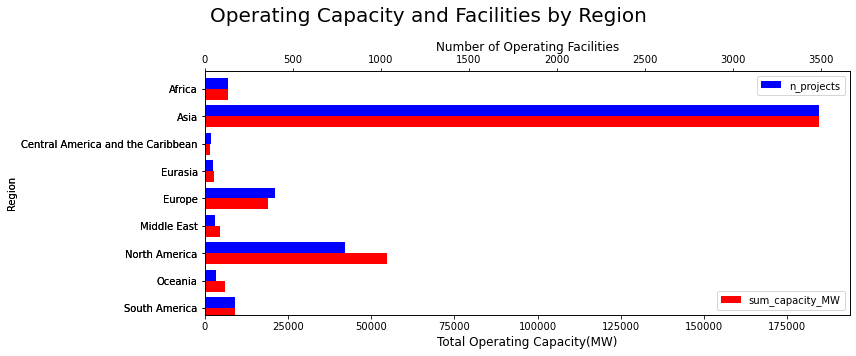

In [28]:
operating = continents[continents['Status']=='operating'].sort_values(by='Region', ascending=False)
operating.set_index('Region', inplace=True)
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,8), sharey=True, tight_layout=True)
fig = plt.figure(tight_layout=True, figsize=(12,5))
ax1=fig.add_subplot(111)
ax2= ax1.twiny()

width = 0.4
operating.sum_capacity_MW.plot(kind='barh', color='red', width=width, ax=ax1, position=1)
operating.n_projects.plot(kind='barh', color='blue', width = width, ax=ax2, position=0)
ax1.set_xlabel('Total Operating Capacity(MW)', fontsize=12)
ax2.set_xlabel('Number of Operating Facilities', fontsize=12)
ax1.legend(loc='lower right')
ax2.legend()
fig.suptitle('Operating Capacity and Facilities by Region', fontsize=20)

plt.show()

### Establish the Operating Capacity and Number of  Projects Being Planned in Each Region:


In [29]:
planned = continents[continents['Status'].isin(['construction','announced','development'])].sort_values(by='Region', ascending=False)
planned = planned.groupby(['Region'], as_index=True).agg(
    { #count n projects
    'n_projects': 'sum',
    #find total capacity
    'sum_capacity_MW': 'sum'})
planned.sort_index(ascending=False, inplace=True)

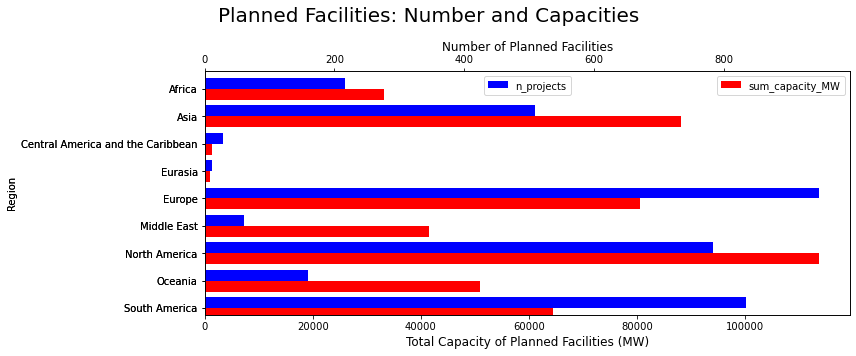

In [30]:

fig = plt.figure(tight_layout=True, figsize=(12,5))
ax1=fig.add_subplot(111)
ax2= ax1.twiny()

width = 0.4
planned.sum_capacity_MW.plot(kind='barh', color='red', width=width, ax=ax1, position=1)
planned.n_projects.plot(kind='barh', color='blue', width = width, ax=ax2, position=0)
ax1.set_xlabel('Total Capacity of Planned Facilities (MW)', fontsize=12)
ax2.set_xlabel('Number of Planned Facilities', fontsize=12)
ax1.legend()
ax2.legend(loc='upper center')
fig.suptitle('Planned Facilities: Number and Capacities', fontsize=20)

plt.show()

Planned projects include those currently under construction, those in development and those that have been announced.

The disparities between the number of projects planned and the capacity of those planned projects gives us some insights:

    - In some regions, projects tend to be larger (North America, Oceania, Middle East, Asia)
    - In some regions, projects tend to be smaller (South America, Europe)
    - Central America and Eurasia are the furthest behind by far, though!

## Look at failed projects in each region:

This includes projects that have been cancelled, mothballed, shelved or retired.

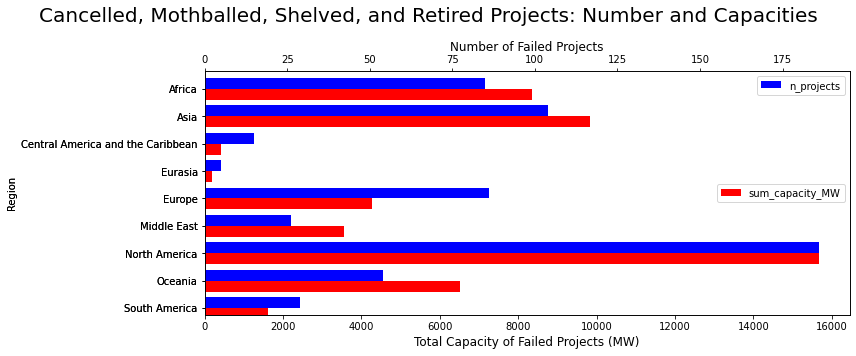

In [31]:
out_of_operation = continents[continents['Status'].isin(['shelved','mothballed','retired','cancelled'])].groupby('Region',as_index=False).agg({'sum_capacity_MW': 'sum','n_projects': 'sum'})
out_of_operation.set_index('Region', inplace=True)
out_of_operation.sort_index(ascending=False, inplace=True)

fig = plt.figure(tight_layout=True, figsize=(12,5))
ax1=fig.add_subplot(111)
ax2= ax1.twiny()

width = 0.4
out_of_operation.sum_capacity_MW.plot(kind='barh', color='red', width=width, ax=ax1, position=1)
out_of_operation.n_projects.plot(kind='barh', color='blue', width = width, ax=ax2, position=0)
ax1.set_xlabel('Total Capacity of Failed Projects (MW)', fontsize=12)
ax2.set_xlabel('Number of Failed Projects', fontsize=12)
ax1.legend(loc='center right')
ax2.legend()
fig.suptitle('Cancelled, Mothballed, Shelved, and Retired Projects: Number and Capacities', fontsize=20)

plt.show()


In [32]:
in_operation = continents[continents['Status'].isin(['operating','construction','development','announced'])].groupby('Region',as_index=False)

,Operating,In Construction,In Development,Announced
South America,9224,14569,46564,3278
Oceania,6097,4696,18738,27608
North America,54860,19225,59948,34533
Middle East,4667,5372,9220,26985
Europe,19042,4531,65151,10831
Eurasia,2805,384,456,100
Central America and the Caribbean,1563,239,349,809
Asia,184439,11499,38188,38443
Africa,6986,3585,19888,9712


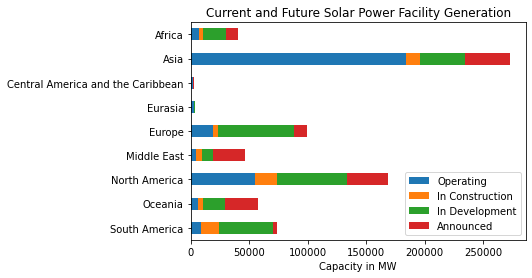

In [33]:
regions = continents[continents['Status'].isin(['construction'])]['Region']
operating = continents[continents['Status'].isin(['operating'])]['sum_capacity_MW']
construction = continents[continents['Status'].isin(['construction'])]['sum_capacity_MW']
development = continents[continents['Status'].isin(['development'])]['sum_capacity_MW']
announced = continents[continents['Status'].isin(['announced'])]['sum_capacity_MW']
width=0.55

current_planned_capacity = pd.DataFrame({'Operating':list(operating),
                                         'In Construction': list(construction),
                                         'In Development': list(development),
                                         'Announced': list(announced)},
                                       index = list(regions))
current_planned_capacity.sort_index(ascending=False, inplace=True)

current_planned_capacity.plot(kind='barh',stacked=True)
plt.title('Current and Future Solar Power Facility Generation')
plt.xlabel('Capacity in MW')
#plt.xticks(labels=regions)
current_planned_capacity


In [34]:
#which countries are considered to be "Eurasia" and "Central America" anyway?

Eurasian_countries = summary[summary.Region == 'Eurasia'].Country.unique()
centralam_countries = summary[summary.Region == 'Central America and the Caribbean'].Country.unique()

print('Countries in Eurasia: {}'.format(Eurasian_countries))
print('Eurasia Count: {}'.format(len(Eurasian_countries)))
print('Countries in Central America and the Carribean: {}'.format(centralam_countries))
print('Central America and the Carribean Count: {}'.format(len(centralam_countries)))



Countries in Eurasia: ['Armenia' 'Azerbaijan' 'Georgia' 'Russia' 'Turkey']
Eurasia Count: 5
Countries in Central America and the Carribean: ['Barbados' 'Cuba' 'Dominican Republic' 'El Salvador' 'Guatemala' 'Haiti'
 'Honduras' 'Jamaica' 'Nicaragua' 'Panama' 'Puerto Rico'
 'Saint Kitts and Nevis' 'Trinidad and Tobago']
Central America and the Carribean Count: 13


Now I want to summarize the net solar capacity in each country. To do so, I'm going to summarize and aggregate by country, as above. Then, I'll calculate the total current + planned

In [36]:
#check out our work
summary.head()

,Country,Status,Region,n_projects,min_capacity_MW,max_capacity_MW,sum_capacity_MW,mean_capacity_MW,min_year,max_year,mean_year,median_year
0,Afghanistan,announced,Asia,1,3000,3000,3000,3000.00,2025.0,2025.0,2025.0,2025.0
1,Afghanistan,development,Asia,4,20,50,135,33.75,2022.0,2024.0,2022.5,2022.0
2,Afghanistan,operating,Asia,1,30,30,30,30.00,NaN,NaN,NaN,NaN
3,Afghanistan,shelved,Asia,2,40,50,90,45.00,NaN,NaN,NaN,NaN
4,Albania,announced,Europe,1,150,150,150,150.00,NaN,NaN,NaN,NaN


In [46]:
country_summary = summary.groupby('Country')['sum_capacity_MW'].sum().reset_index() #get sum of capacity of all PV facilities, in every status, by country
country_summary.head()

,Country,sum_capacity_MW
0,Afghanistan,3255
1,Albania,640
2,Algeria,5488
3,Angola,460
4,Argentina,1364


In [47]:
#save country_summary as csv to be used with tableau
country_summary.to_csv('country_summary.csv')